In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Units: s/byte
T_copy = 1/(12600.2*1024*1024)

# Function that takes the number of points as argument and returns the time it takes to send AND recv that many
def T_MPI_sendrecv(x):
    if x < 500:
        return (-0.00004615302*x+12.1250764)/1000
    else:
        return (0.000002394175*x-0.01176775)/1000

In [7]:
# L, R, T, B
halo = [1,1,1,1]

# latency (for MPI, etc)
latency = 0.008

In [8]:
T_1 = np.array([])
T_10 = np.array([])
T_100 = np.array([])
T_1000 = np.array([])
for i in range(100,5000,100):
    num_halo = 8*( (halo[0]+halo[1]+halo[2]+halo[3])*i )
    T_1 = np.append(T_1, [latency + (num_halo*T_copy + T_MPI_sendrecv(num_halo) + num_halo*T_copy)])
    T_10 = np.append(T_10, [latency + 10*(num_halo*T_copy + T_MPI_sendrecv(num_halo) + num_halo*T_copy)])
    T_100 = np.append(T_100, [latency + 100*(num_halo*T_copy + T_MPI_sendrecv(num_halo) + num_halo*T_copy)])
    T_1000 = np.append(T_1000, [latency + 1000*(num_halo*T_copy + T_MPI_sendrecv(num_halo) + num_halo*T_copy)])

In [9]:
x_exp = np.array([100, 500, 1000, 2000, 3000, 4000, 5000])
T_exp_1 = np.array([8.27784, 8.04444, 6.70761, 7.33502, 7.33956, 7.45345, 7.30441])/1000
T_exp_10 = np.array([10.245, 9.33402, 8.18851, 9.09714, 10.5831, 11.0485, 11.7523])/1000
T_exp_100 = np.array([10.2513, 14.1145, 21.4272, 22.0109, 29.6573, 39.6255, 48.5832])/1000
T_exp_1000 = np.array([21.841, 45.5485, 80.2913, 151.296, 226.143, 328.604, 420.334])/1000


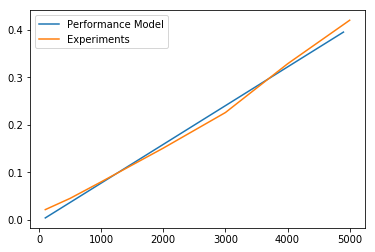

In [17]:
# Change T_1 and T_exp_1 to plot a different number of iterations
f = plt.figure()

line1, = plt.plot(range(100,5000,100),T_1000, label="Performance Model")
line2, = plt.plot(x_exp, T_exp_1000, label="Experiments")

plt.legend(handles=[line1, line2], loc=2)

plt.show()

f.savefig("performance.pdf", bbox_inches='tight')